# Homework #1: AB-testing<br>and the Multi-Armed Bayesian Bandit

### You have three choices... choose wisely, my friends...


|Option|The "Red" one|The "Blue" one|The "Other" one|
|-|-|-|-|
|Unknown Probability of Success|$\theta_A$ | $\theta_B$ | $\theta_C$ |

$$p(\theta_j|x_j,n_j) \propto \theta^{x_j+\alpha_j-1}(1-\theta_j)^{n-x+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$

- Try one out, and collect that data update...
    - What's the data?
    - What's the update for the posterior in question?
- Which one of the three choices will you try out? How will you choose? 


- Hints: <u>You can use *simulation* to find out the *relative belief* (i.e., probability) that each of the choices is the best.</u> Posterior distributions characterize your beliefs about the parameters $\theta_A, \theta_B$ and $\theta_C$. What can you learn by repeatedly sampling values from the posterior distribution while comparing the values of each triplet? If you know the chances that A, B, and C are the best choice, how could you balance ***exploration versus exploitation*** when choosing which of the possible options to collect the next data point on next?



# Answer
Since $\theta_A$, $\theta_B$, $\theta_C$ are currently unknown, let's specify the parameter values. Let:
- $\theta_A$ = 0.4
- $\theta_B$ = 0.6
- $\theta_C$ = 0.8

The goal is to develop an algorithm that, given without any prior knowledge on our three options: The "Red" one, The "Blue" one, and The "Other" one, find the probability of success of each game, in the way that every time we would get an outcome from playing a certain game, we would update our belief on that particular game and move on to play the next round. By doing so, we would be able to keep continue playing the game and picking the options that will yield the highest probability of success. 

First, we will set up the initial parameters.

In [65]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

pA = 0.4
pB = 0.6
pC = 0.8

# Number of trials and successes for each bandit (option)
num_trials = 1000
successes = np.zeros(3) # initialize to 0 first

Now, we will carry on a Bayesian Bandit simulation, in order to balance exploration versus exploitation - which will sample from the posterior distributions for each option, using the formula given in the question, which is a beta distrbution. Then, we choose the bandit/option the the highest sampled probability. Afterwards, we will simulate a trial for the chosen option using a binomial distribution. We update the success for the chosen option, and update the prior distrbution. 

We will also plot the probability density functions of each set of beta distribution parameters to observe patterns based on the number of trials: 10, 500, and 1000.

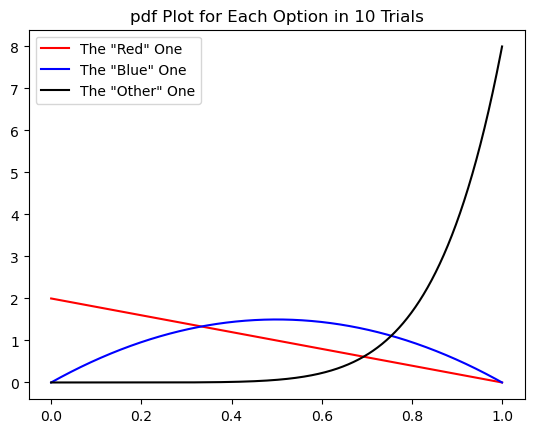

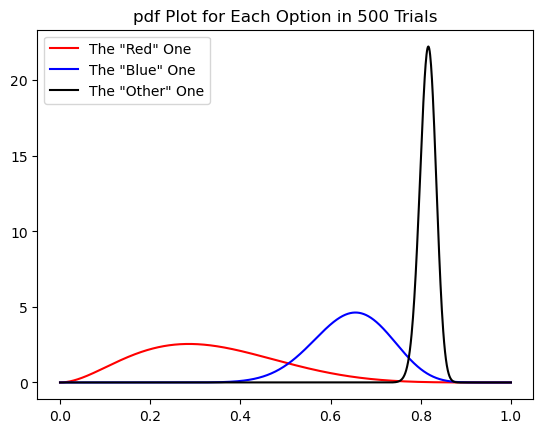

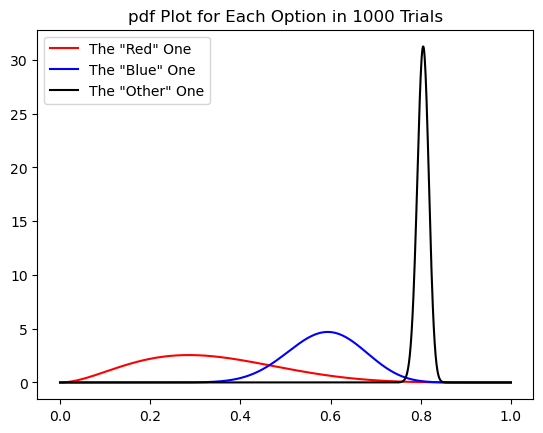

In [81]:
np.random.seed(17)

def pdf_plot(x, alpha, b, i):
    y_A = beta.pdf(x, alpha[0], b[0])
    y_B = beta.pdf(x, alpha[1], b[1])
    y_C = beta.pdf(x, alpha[2], b[2])
    
    plt.plot(x, y_A, color='red', label='The "Red" One')
    plt.plot(x, y_B, color='blue', label='The "Blue" One')
    plt.plot(x, y_C, color='black', label='The "Other" One')
    
    plt.title("pdf Plot for Each Option in " + str(i+1) +" Trials")
    plt.legend()
    plt.show()

# Lists to store each option selections
option_selections = []

# Parameters for the beta distribution (prior)
alpha_prior = np.ones(3)
beta_prior = np.ones(3)

alpha_prior_lst = []
beta_prior_lst = []

for i in range(num_trials):
    # 1. sample from the posterior distributions for each option
    samples = [beta.rvs(a=alpha_prior[j], b=beta_prior[j], size=1)[0] for j in range(3)]

    # 2. choose the option with the highest sampled probability
    chosen_option = np.argmax(samples)

    # 3. simulate a trial for the chosen option using binomial distribution
    outcome = np.random.binomial(n=1, p=[pA, pB, pC][chosen_option])

    # 4. update successes for the chosen option
    successes[chosen_option] += outcome

    # 5. update the prior distribution for the chosen option
    alpha_prior[chosen_option] += outcome
    beta_prior[chosen_option] += (1 - outcome)

    # 6. store the option selections
    option_selections.append(chosen_option)
    
    if i == 9 or i == 499 or i == 999:
        x = np.linspace(0, 1, 1000)
        pdf_plot(x, alpha_prior, beta_prior, i)

As we can see from the graphs, as the number of iterations/simulation increases, we see that the shape of the beta distribution for "The Other One" to be narrower, and narrower. In the final graph, the shape becomes extremely narrow and peaks around 0.8 for the pdf of the "The Other One" option when 1000 trials are done.

In [82]:
print(option_selections)

[1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

As we can see, the algorithm first "explores" its options, and once it figures out the option/bandit that yields a higher probability of success, then it continues to "exploit" that option.

All told, addressing the questions in the prompt:

### 1. What's the data?

The data is simulated via a binomial distribution, where a trial is conducted for the chosen option, with the outcome determined by the success probability of that given option.

### 2. What's the update for the posterior in question?

The posterior update is done in the simulation loop after a trial is simulated for the chosen option, where the beta distribution is updated based on the number of successes and failures (observations) for each option.

This includes the following:
```
successes[chosen_option] += outcome
alpha_prior[chosen_option] += outcome
beta_prior[chosen_option] += (1 - outcome)
```

### 3. Which one of the three choices will you try out? How will you choose?

Our simulation chooses the option with the highest sampled probability from their respective posterior distributions by using a for loop (iterating 1000 trials). The selection is based on exploration (sampling from posterior distributions) and exploitation (choosing the bandit with the highest sampled probability), which is also known as Bayesian Bandits, when choosing which of the possible options to collect the next data point on its next iteration.